In [10]:
import json
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import natsort
from glob import glob

from IPython.display import Image
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

def show_img(frame_path1,frame_path2):
    fig = plt.figure(figsize = (15,15))
    img1 = cv2.imread(frame_path1)
    img2 = cv2.imread(frame_path2)

    plt.subplot(1,2,1)
    plt.imshow(img1[:,:,::-1])
    plt.title('test 1')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(img2[:,:,::-1]) # BGR -> RGB
    plt.title('test 2')
    plt.xticks([])
    plt.yticks([])
    plt.show()


MOVE_PARTS=[['nose','Middle'],
            
            ['LShoulder','RShoulder'],
            ['LElbow','LShoulder'],
            ['LWrist','LElbow'],
            ['RElbow','RShoulder'],
            ['RWrist','RElbow'],

            ['LHip','RHip'],
            ['LKnee','LHip'],
            ['LAnkle','LKnee'],
            ['RKnee','RHip'],
            ['RAnkle','RKnee']]

## X, Y, Z - cosine sim

In [4]:
id = 'yt_newjeans_ditto1'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST1=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

id = 'yt_newjeans_ditto2'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST2=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

MOVE_VECTOR1=[]
FRAME_LIST1=[]


for file in LABEL_LIST1:
    f = open(file)
    data = json.load(f)
    data['Middle']=[(data['LShoulder'][0]+data['RShoulder'][0])/2,(data['LShoulder'][1]+data['RShoulder'][1])/2,(data['LShoulder'][2]+data['RShoulder'][2])/2]
    file_vec=[]
    for part in MOVE_PARTS:
        st_point=data[part[0]][:3] #x,y #유사도 측정 성능 향상을 위해 z삭제
        end_point=data[part[1]][:3] #x,y #z 삭제
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec.append(vec)
    MOVE_VECTOR1.append(file_vec)
    FRAME_LIST1.append(str(int(data['frame_num'])))

MOVE_VECTOR2=[]
FRAME_LIST2=[]

for file in LABEL_LIST2:
    f = open(file)
    data = json.load(f)
    data['Middle']=[(data['LShoulder'][0]+data['RShoulder'][0])/2,(data['LShoulder'][1]+data['RShoulder'][1])/2,(data['LShoulder'][2]+data['RShoulder'][2])/2]
    file_vec=[]
    for part in MOVE_PARTS:
        st_point=data[part[0]][:3]
        end_point=data[part[1]][:3]
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec.append(vec)
    MOVE_VECTOR2.append(file_vec)
    FRAME_LIST2.append(str(int(data['frame_num'])))
    
        

In [5]:
# 코사인 Good 1 ~ -1 Bat
# 유클리드 거리 : Good 0 ~  2 Bad

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

def show_img(frame_path1,frame_path2):
    fig = plt.figure(figsize = (15,15))
    img1 = cv2.imread(frame_path1)
    img2 = cv2.imread(frame_path2)

    plt.subplot(1,2,1)
    plt.imshow(img1[:,:,::-1])
    plt.title('test 1')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(img2[:,:,::-1]) # BGR -> RGB
    plt.title('test 2')
    plt.xticks([])
    plt.yticks([])
    plt.show()



def check_sim(test1,test2):
    score_avg = []
    i=0
    for move1,move2 in zip(MOVE_VECTOR1[test1],MOVE_VECTOR2[test2]):
        cosine_sim= cosine_similarity(move1.flatten(),move2.flatten())
        eud = np.sqrt(2*(1-cosine_sim))
        score=100-(100*eud/2)
        score_avg.append(score) 
        part1 = MOVE_PARTS[i][0]
        part2 = MOVE_PARTS[i][1]

        print(f"{part1:10s} → {part2:>10s}",end=' ')
        print(' | score : ',score.round(3))

        i+=1


    print(f'>>> 총 유사도 점수 : ', np.mean(score_avg).round(3))

    frame_path1=f'sample/dancingImg/yt_newjeans_ditto1/{FRAME_LIST1[test1]}.jpg'
    frame_path2=f'sample/dancingImg/yt_newjeans_ditto2/{FRAME_LIST2[test2]}.jpg'

    show_img(frame_path1,frame_path2)



nose       →     Middle  | score :  96.661
LShoulder  →  RShoulder  | score :  95.883
LElbow     →  LShoulder  | score :  54.142
LWrist     →     LElbow  | score :  70.626
RElbow     →  RShoulder  | score :  40.677
RWrist     →     RElbow  | score :  52.967
LHip       →       RHip  | score :  93.169
LKnee      →       LHip  | score :  98.443
LAnkle     →      LKnee  | score :  80.258
RKnee      →       RHip  | score :  88.037
RAnkle     →      RKnee  | score :  78.501
>>> 총 유사도 점수 :  77.215


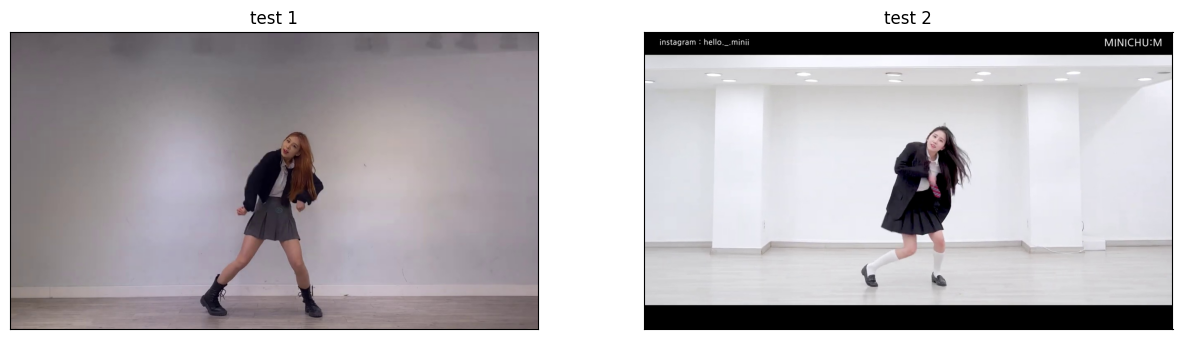

In [6]:
# test1 = 320
# test2 = 420

check_sim(320,420)

nose       →     Middle  | score :  91.089
LShoulder  →  RShoulder  | score :  39.227
LElbow     →  LShoulder  | score :  89.314
LWrist     →     LElbow  | score :  74.234
RElbow     →  RShoulder  | score :  81.52
RWrist     →     RElbow  | score :  93.43
LHip       →       RHip  | score :  40.441
LKnee      →       LHip  | score :  93.949
LAnkle     →      LKnee  | score :  92.74
RKnee      →       RHip  | score :  88.53
RAnkle     →      RKnee  | score :  79.503
>>> 총 유사도 점수 :  78.544


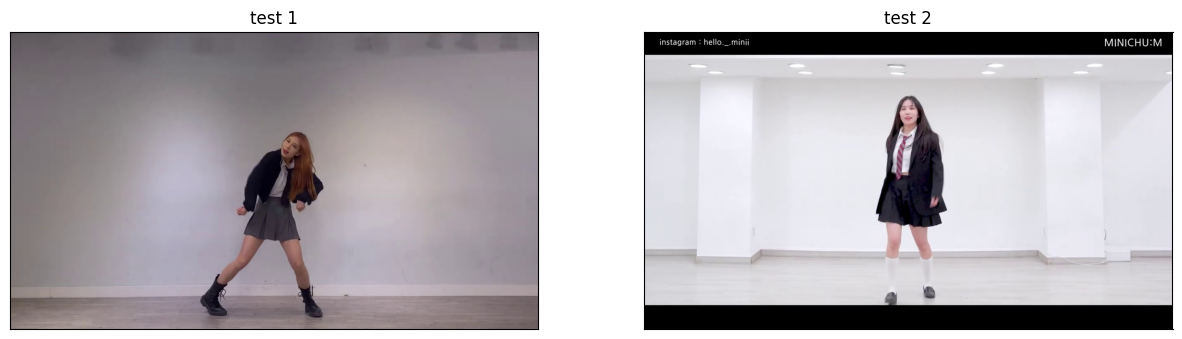

In [7]:
check_sim(320,2500)

## X, Y - cosine sim

In [8]:
id = 'yt_newjeans_ditto1'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST1=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

id = 'yt_newjeans_ditto2'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST2=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

MOVE_VECTOR1=[]
FRAME_LIST1=[]


for file in LABEL_LIST1:
    f = open(file)
    data = json.load(f)
    data['Middle']=[(data['LShoulder'][0]+data['RShoulder'][0])/2,(data['LShoulder'][1]+data['RShoulder'][1])/2,(data['LShoulder'][2]+data['RShoulder'][2])/2]
    file_vec=[]
    for part in MOVE_PARTS:
        st_point=data[part[0]][:2] #x,y #유사도 측정 성능 향상을 위해 z삭제
        end_point=data[part[1]][:2] #x,y #z 삭제
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec.append(vec)
    MOVE_VECTOR1.append(file_vec)
    FRAME_LIST1.append(str(int(data['frame_num'])))

MOVE_VECTOR2=[]
FRAME_LIST2=[]

for file in LABEL_LIST2:
    f = open(file)
    data = json.load(f)
    data['Middle']=[(data['LShoulder'][0]+data['RShoulder'][0])/2,(data['LShoulder'][1]+data['RShoulder'][1])/2,(data['LShoulder'][2]+data['RShoulder'][2])/2]
    file_vec=[]
    for part in MOVE_PARTS:
        st_point=data[part[0]][:2]
        end_point=data[part[1]][:2]
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec.append(vec)
    MOVE_VECTOR2.append(file_vec)
    FRAME_LIST2.append(str(int(data['frame_num'])))
    
        

In [9]:
# 코사인 Good 1 ~ -1 Bat
# 유클리드 거리 : Good 0 ~  2 Bad


def check_sim(test1,test2):
    score_avg = []
    i=0
    for move1,move2 in zip(MOVE_VECTOR1[test1],MOVE_VECTOR2[test2]):
        cosine_sim= cosine_similarity(move1.flatten(),move2.flatten())
        eud = np.sqrt(2*(1-cosine_sim))
        score=100-(100*eud/2)
        score_avg.append(score) 
        part1 = MOVE_PARTS[i][0]
        part2 = MOVE_PARTS[i][1]

        print(f"{part1:10s} → {part2:>10s}",end=' ')
        print(' | score : ',score.round(3))

        i+=1


    print(f'>>> 총 유사도 점수 : ', np.mean(score_avg).round(3))

    frame_path1=f'sample/dancingImg/yt_newjeans_ditto1/{FRAME_LIST1[test1]}.jpg'
    frame_path2=f'sample/dancingImg/yt_newjeans_ditto2/{FRAME_LIST2[test2]}.jpg'

    show_img(frame_path1,frame_path2)



nose       →     Middle  | score :  93.849
LShoulder  →  RShoulder  | score :  95.588
LElbow     →  LShoulder  | score :  93.934
LWrist     →     LElbow  | score :  3.244
RElbow     →  RShoulder  | score :  97.664
RWrist     →     RElbow  | score :  33.301
LHip       →       RHip  | score :  90.589
LKnee      →       LHip  | score :  98.718
LAnkle     →      LKnee  | score :  90.176
RKnee      →       RHip  | score :  88.748
RAnkle     →      RKnee  | score :  81.791
>>> 총 유사도 점수 :  78.873


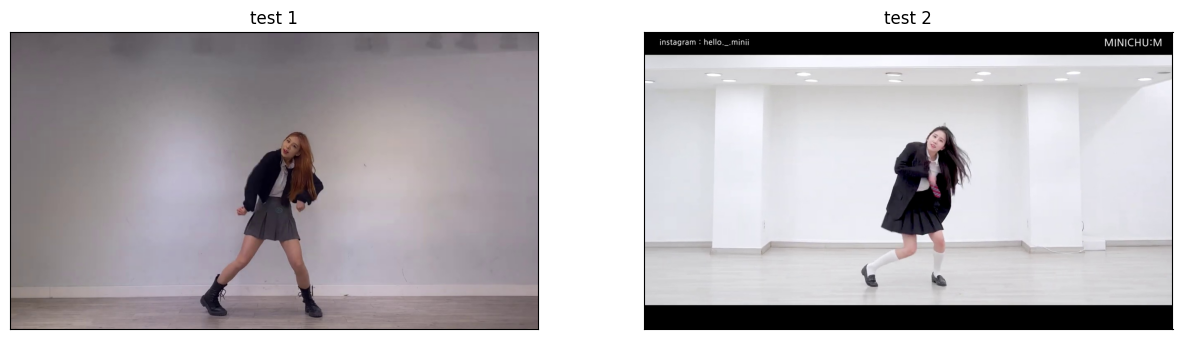

In [10]:
check_sim(320,420)

nose       →     Middle  | score :  89.16
LShoulder  →  RShoulder  | score :  62.812
LElbow     →  LShoulder  | score :  99.631
LWrist     →     LElbow  | score :  95.458
RElbow     →  RShoulder  | score :  79.883
RWrist     →     RElbow  | score :  97.064
LHip       →       RHip  | score :  91.926
LKnee      →       LHip  | score :  94.011
LAnkle     →      LKnee  | score :  94.755
RKnee      →       RHip  | score :  89.426
RAnkle     →      RKnee  | score :  77.767
>>> 총 유사도 점수 :  88.354


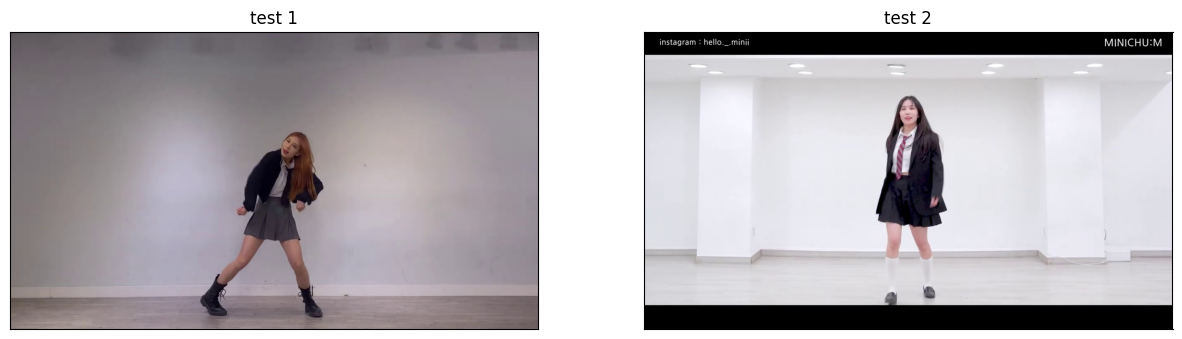

In [12]:
check_sim(320,2500)

# AutoENcoder MODEL - X,Y,Z 내적  

In [2]:
from keras.models import load_model
model = load_model('autoencoder_model/model_ckpt.h5')

In [3]:
id = 'yt_newjeans_ditto1'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

cross_list1=[]
FRAME_LIST1=[]

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    keypoint = [data[key][:3] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            cross = np.cross(point,keypoint[k])
            vec_comb.append(cross)
    
    cross_list1.append(vec_comb)
    FRAME_LIST1.append(str(int(data['frame_num'])))

id = 'yt_newjeans_ditto1'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

cross_list2=[]
FRAME_LIST2=[]

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    keypoint = [data[key][:3] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            cross = np.cross(point,keypoint[k])
            vec_comb.append(cross)
    
    cross_list2.append(vec_comb)
    FRAME_LIST2.append(str(int(data['frame_num'])))
            

In [4]:
cross_list1=np.array(cross_list1).swapaxes(1,2)
cross_list2=np.array(cross_list2).swapaxes(1,2)

In [5]:
cross_list1.shape

(5315, 3, 78)

In [6]:
def checkModelSim(test1,test2):

    yhat1 = model.predict(np.array(cross_list1[test1]).reshape(1,3,78))
    yhat2 = model.predict(np.array(cross_list1[test2]).reshape(1,3,78))

    frame_path1=f'sample/dancingImg/yt_newjeans_ditto1/{FRAME_LIST1[test1]}.jpg'
    frame_path2=f'sample/dancingImg/yt_newjeans_ditto2/{FRAME_LIST2[test2]}.jpg'

    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))

    show_img(frame_path1,frame_path2)

    
    

In [11]:
checkModelSim(320,420)

1/1 [==============================] - 0s 30ms/step


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.08370826  0.10804191  0.07382169  0.06085403  0.09979564  0.10075605
  0.14565536  0.18196152  0.2511835   0.12609619  0.15356472  0.20946777
  0.00313736 -0.04887779 -0.02524505 -0.00467085 -0.02639521  0.02828606
  0.03190131  0.07672703  0.00228707 -0.00763559  0.0213079  -0.06918207
 -0.03073249 -0.01105024 -0.03933029  0.02905748  0.03009238  0.08856014
 -0.00196985 -0.01603961  0.02519071  0.0196802   0.05294172  0.02555359
  0.11476965  0.13407896  0.21634373  0.0769271   0.08871429  0.15720621
  0.02471408  0.00481785  0.06319478  0.07005528  0.12713984  0.03858943
  0.03670606  0.07289641 -0.02592669  0.03950676  0.03916935  0.10442229
  0.0119682  -0.00424237  0.04047947  0.07640707  0.08468571  0.16974668
  0.04646147  0.03862914  0.10262643 -0.0101227   0.05508992 -0.03759075
 -0.06901114 -0.03071388  0.08482146 -0.03811308 -0.07030009 -0.02086124
 -0.10830542 -0.16863807 -0.12428522 -0.01971364  0.02718878  0.06757824
 -0.10796671 -0.11768822 -0.04865132 -0.07183343 -0.08397121 -0.04535987
 -0.12928407 -0.1327196  -0.19177437 -0.09549863 -0.06617206 -0.09992019
 -0.00532927  0.06613786  0.02565096  0.0088098   0.04138445 -0.02582492
 -0.02199968 -0.08630142 -0.00344589  0.02768313 -0.01058985  0.07284591
  0.0336797   0.01399849  0.04882744 -0.02562735 -0.02021333 -0.08473742
  0.00474278  0.03636141 -0.00481026 -0.03218009 -0.04686378 -0.00983559
 -0.09115053 -0.09042052 -0.16182733 -0.06148639 -0.02600539 -0.06737348
 -0.01381957  0.01558123 -0.04941927 -0.04647863 -0.098176   -0.02168302
  0.00284121 -0.03233969  0.0294762  -0.03413841 -0.03271275 -0.08214928
 -0.00769297  0.01468948 -0.01507976 -0.06345417 -0.06800161 -0.11636029
 -0.03630431 -0.0126576  -0.04027572  0.00379759 -0.05306032  0.02485768
  0.04942227  0.00771386 -0.06545447  0.01927176  0.04624034  0.00472613
  0.07501482  0.10228765  0.05450826  0.02459269 -0.01229326 -0.03308819
  0.0313938   0.07028265  0.10013233  0.03358208  0.08616941  0.14139031
  0.13221246  0.20038858  0.25908718  0.13828453  0.23344329  0.3184602
  0.03823704  0.07276084  0.00796962  0.06284836  0.11929744  0.11133706
  0.17809258  0.24039748  0.11869508  0.21983379  0.30798694  0.03095191
 -0.02229473  0.0314347   0.09018809  0.07535043  0.14628574  0.20575154
  0.08797923  0.19660236  0.28499967 -0.0500907   0.00496227  0.0605636
  0.0454964   0.11670191  0.17309818  0.05862095  0.16384313  0.25836617
  0.05083922  0.10132817  0.0869033   0.1499132   0.20284407  0.09964228
  0.19197316  0.27091983  0.04781767  0.02748583  0.08384977  0.13381147
  0.04512794  0.1363467   0.21748154 -0.02566699  0.02580106  0.07252087
 -0.00746973  0.07910539  0.1605476   0.05980806  0.11343766  0.01686521
  0.11825175  0.2096405   0.04938667 -0.03687079  0.07505542  0.17569508
 -0.08460224  0.03597966  0.14858027  0.09793904  0.18201274  0.09270479].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
checkModelSim(320,1500)

1/1 [==============================] - 0s 38ms/step


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.08370826  0.10804191  0.07382169  0.06085403  0.09979564  0.10075605
  0.14565536  0.18196152  0.2511835   0.12609619  0.15356472  0.20946777
  0.00313736 -0.04887779 -0.02524505 -0.00467085 -0.02639521  0.02828606
  0.03190131  0.07672703  0.00228707 -0.00763559  0.0213079  -0.06918207
 -0.03073249 -0.01105024 -0.03933029  0.02905748  0.03009238  0.08856014
 -0.00196985 -0.01603961  0.02519071  0.0196802   0.05294172  0.02555359
  0.11476965  0.13407896  0.21634373  0.0769271   0.08871429  0.15720621
  0.02471408  0.00481785  0.06319478  0.07005528  0.12713984  0.03858943
  0.03670606  0.07289641 -0.02592669  0.03950676  0.03916935  0.10442229
  0.0119682  -0.00424237  0.04047947  0.07640707  0.08468571  0.16974668
  0.04646147  0.03862914  0.10262643 -0.0101227   0.05508992 -0.03759075
 -0.06901114 -0.03071388  0.08482146 -0.03811308 -0.07030009 -0.02086124
 -0.10830542 -0.16863807 -0.12428522 -0.01971364  0.02718878  0.06757824
 -0.10796671 -0.11768822 -0.04865132 -0.07183343 -0.08397121 -0.04535987
 -0.12928407 -0.1327196  -0.19177437 -0.09549863 -0.06617206 -0.09992019
 -0.00532927  0.06613786  0.02565096  0.0088098   0.04138445 -0.02582492
 -0.02199968 -0.08630142 -0.00344589  0.02768313 -0.01058985  0.07284591
  0.0336797   0.01399849  0.04882744 -0.02562735 -0.02021333 -0.08473742
  0.00474278  0.03636141 -0.00481026 -0.03218009 -0.04686378 -0.00983559
 -0.09115053 -0.09042052 -0.16182733 -0.06148639 -0.02600539 -0.06737348
 -0.01381957  0.01558123 -0.04941927 -0.04647863 -0.098176   -0.02168302
  0.00284121 -0.03233969  0.0294762  -0.03413841 -0.03271275 -0.08214928
 -0.00769297  0.01468948 -0.01507976 -0.06345417 -0.06800161 -0.11636029
 -0.03630431 -0.0126576  -0.04027572  0.00379759 -0.05306032  0.02485768
  0.04942227  0.00771386 -0.06545447  0.01927176  0.04624034  0.00472613
  0.07501482  0.10228765  0.05450826  0.02459269 -0.01229326 -0.03308819
  0.0313938   0.07028265  0.10013233  0.03358208  0.08616941  0.14139031
  0.13221246  0.20038858  0.25908718  0.13828453  0.23344329  0.3184602
  0.03823704  0.07276084  0.00796962  0.06284836  0.11929744  0.11133706
  0.17809258  0.24039748  0.11869508  0.21983379  0.30798694  0.03095191
 -0.02229473  0.0314347   0.09018809  0.07535043  0.14628574  0.20575154
  0.08797923  0.19660236  0.28499967 -0.0500907   0.00496227  0.0605636
  0.0454964   0.11670191  0.17309818  0.05862095  0.16384313  0.25836617
  0.05083922  0.10132817  0.0869033   0.1499132   0.20284407  0.09964228
  0.19197316  0.27091983  0.04781767  0.02748583  0.08384977  0.13381147
  0.04512794  0.1363467   0.21748154 -0.02566699  0.02580106  0.07252087
 -0.00746973  0.07910539  0.1605476   0.05980806  0.11343766  0.01686521
  0.11825175  0.2096405   0.04938667 -0.03687079  0.07505542  0.17569508
 -0.08460224  0.03597966  0.14858027  0.09793904  0.18201274  0.09270479].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# AutoEncoder MODEL - X,Y & 조합 단위 벡터

In [14]:
from keras.models import load_model
model = load_model('autoencoder_model/model_xy_motion_ckpt.h5')

In [15]:
id = 'yt_newjeans_ditto1'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

tcross_list1=[]
tFRAME_LIST1=[]

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    keypoint = [data[key][:2] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            # cross = np.cross(point,keypoint[k])
            st_point=point 
            end_point=keypoint[k]
            vec=[ep-sp for sp, ep in zip(st_point, end_point)]
            vec=vec/np.linalg.norm(vec)
            vec_comb.append(vec)
    
    tcross_list1.append(vec_comb)
    tFRAME_LIST1.append(str(int(data['frame_num'])))
            
id = 'yt_newjeans_ditto2'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

tcross_list2=[]
tFRAME_LIST2=[]

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    keypoint = [data[key][:2] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            st_point=point 
            end_point=keypoint[k]
            vec=[ep-sp for sp, ep in zip(st_point, end_point)]
            vec=vec/np.linalg.norm(vec)
            vec_comb.append(vec)
    
    tcross_list2.append(vec_comb)
    tFRAME_LIST2.append(str(int(data['frame_num'])))
            
tcross_list1=np.array(tcross_list1).swapaxes(1,2)
tcross_list2=np.array(tcross_list2).swapaxes(1,2)


In [17]:
tcross_list1.shape

(5315, 2, 78)

In [18]:
def checkModelSim(test1,test2):

    yhat1 = model.predict(tcross_list1[test1].reshape(1,2,78))
    yhat2 = model.predict(tcross_list1[test2].reshape(1,2,78))

    frame_path1=f'sample/dancingImg/yt_newjeans_ditto1/{FRAME_LIST1[test1]}.jpg'
    frame_path2=f'sample/dancingImg/yt_newjeans_ditto2/{FRAME_LIST2[test2]}.jpg'

    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))

    show_img(frame_path1,frame_path2)

In [19]:
# 테스트
checkModelSim(320,420)
checkModelSim(320,1500)

1/1 [==============================] - 0s 62ms/step


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.23517156  0.19589658  0.14334    -0.6770505  -0.48705417 -0.36772817
 -0.07186098  0.02408992  0.05218672 -0.2293307  -0.22956339 -0.28413737
  0.09678242  0.0073878  -0.8262856  -0.9180629  -0.6385497  -0.20409812
 -0.02161507  0.02107557 -0.4176447  -0.32681343 -0.35994658 -0.08033738
 -0.5321946  -0.9217063  -0.9073472  -0.3716197  -0.03598583  0.00843904
 -0.6881191  -0.4341297  -0.44145754 -0.33745104 -0.70702076 -1.021975
 -0.64805615 -0.04953022  0.02143697 -0.92021435 -0.49920782 -0.48511952
 -0.32036844 -0.2877244   0.10915925  0.1444141   0.14562123 -0.07466394
 -0.15043265 -0.23200956 -0.21933098  0.4024686   0.2720166   0.24569425
  0.12744541 -0.10092095 -0.20482904  0.8586183   0.4439811   0.33869287
  0.76599646 -0.027463   -0.18696202  0.19536415  0.16527182 -0.9590367
 -0.46312785 -0.4667772   0.15634811 -0.37797126 -1.0039965  -0.8544463
 -0.2817809  -0.693382   -1.0035188  -0.27369624 -0.34686804 -0.46472937
  0.96968925  0.94506115  0.98616904  0.69789684  0.8749884   0.9366895
  0.9832826   0.99192065  0.9848376   0.96123624  0.96518564  0.9497695
  0.9578802   0.9977719  -0.5844053   0.41718984  0.7563114   0.9806888
  1.0037357   0.9941977   0.90344083  0.9481662   0.9299291   0.96015304
 -0.8635475  -0.29179707  0.45058477  0.9120792   0.9922181   0.99408025
  0.71802545  0.9026156   0.8928858  -0.9809803  -0.6885899   0.03695593
  0.7662388   1.0142953   0.9953418   0.381289    0.8673347   0.86483896
  0.9529362   0.96832055  0.9920111   0.98324245  0.9840407   1.0074145
  0.9949716   0.97620356  0.9867739   0.92036515  0.95641667  0.9760863
  0.98946726  0.9900398   0.97454727  0.5081287   0.9165176   0.9511989
  0.6489206   0.97432303  0.9659852   0.990428    0.9937758  -0.30643654
  0.88521975  0.884362    0.9873739  -0.9001267  -0.07862493  0.52436423
 -0.962647   -0.7203532  -0.12846261  0.9566882   0.94156015  0.8467824 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Compare 2 methodology

In [78]:
id = 'yt_newjeans_ditto1'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

cosine_xyz_1=[]
cosine_xy_1=[] 

cross_xyz_1=[] 

comb_xy_1=[]
comb_xyz_1=[]

FRAME_LIST1=[]

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    keypoint = [data[key][:3] for key in data if key != 'frame_time' and key != 'frame_num' ]
    
    vec_comb=[]
    #3좌표 - 모든 좌표 내적 
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            cross = np.cross(point,keypoint[k])
            vec_comb.append(cross)

    cross_xyz_1.append(vec_comb)

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    #2좌표 - 모든 좌표 조합
    keypoint = [data[key][:2] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            st_point=point 
            end_point=keypoint[k]
            vec=[ep-sp for sp, ep in zip(st_point, end_point)]
            vec=vec/np.linalg.norm(vec)
            vec_comb.append(vec)
    
    comb_xy_1.append(vec_comb)

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    #3좌표 - 모든 좌표 조합
    keypoint = [data[key][:3] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            # cross = np.cross(point,keypoint[k])
            st_point=point 
            end_point=keypoint[k]
            vec=[ep-sp for sp, ep in zip(st_point, end_point)]
            vec=vec/np.linalg.norm(vec)
            vec_comb.append(vec)
    
    comb_xyz_1.append(vec_comb)

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    #cosine - 3/2좌표 - 동작
    file_vec_xyz=[]
    file_vec_xy=[]

    data['Middle']=[(data['LShoulder'][0]+data['RShoulder'][0])/2,(data['LShoulder'][1]+data['RShoulder'][1])/2,(data['LShoulder'][2]+data['RShoulder'][2])/2]
    
    for part in MOVE_PARTS:
        st_point=data[part[0]][:3] #x,y,z
        end_point=data[part[1]][:3] #x,y,z
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec_xyz.append(vec)

        st_point=data[part[0]][:2] #x,y,z
        end_point=data[part[1]][:2] #x,y,z
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec_xy.append(vec)

    cosine_xyz_1.append(file_vec_xyz)
    cosine_xy_1.append(file_vec_xy)

    FRAME_LIST1.append(str(int(data['frame_num'])))


id = 'yt_newjeans_ditto2'
LABEL_PATH = 'sample/dancingLabel/'+id
LABEL_LIST=natsort.natsorted(glob(LABEL_PATH+'/*.json'))

cosine_xyz_2=[] #
cross_xyz_2=[] #

cosine_xy_2=[] #
comb_xy_2=[]
comb_xyz_2=[]
FRAME_LIST2=[]

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    keypoint = [data[key][:3] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]

    #3좌표 - 모든 좌표 내적 
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            cross = np.cross(point,keypoint[k])
            vec_comb.append(cross)

    cross_xyz_2.append(vec_comb)

    #2좌표 - 모든 좌표 조합
    keypoint = [data[key][:2] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            # cross = np.cross(point,keypoint[k])
            st_point=point 
            end_point=keypoint[k]
            vec=[ep-sp for sp, ep in zip(st_point, end_point)]
            vec=vec/np.linalg.norm(vec)
            vec_comb.append(vec)
    
    comb_xy_2.append(vec_comb)

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    #3좌표 - 모든 좌표 조합
    keypoint = [data[key][:3] for key in data if key != 'frame_time' and key != 'frame_num' ]
    vec_comb=[]
    for i,point in enumerate(keypoint):
        for k in range(i+1,len(keypoint)):
            # cross = np.cross(point,keypoint[k])
            st_point=point 
            end_point=keypoint[k]
            vec=[ep-sp for sp, ep in zip(st_point, end_point)]
            vec=vec/np.linalg.norm(vec)
            vec_comb.append(vec)
    
    comb_xyz_2.append(vec_comb)

for file in LABEL_LIST:
    f = open(file)
    data = json.load(f)
    #cosine - 3/2좌표 - 동작
    file_vec_xyz=[]
    file_vec_xy=[]
    data['Middle']=[(data['LShoulder'][0]+data['RShoulder'][0])/2,(data['LShoulder'][1]+data['RShoulder'][1])/2,(data['LShoulder'][2]+data['RShoulder'][2])/2]
    for part in MOVE_PARTS:
        st_point=data[part[0]][:3] #x,y,z
        end_point=data[part[1]][:3] #x,y,z
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec_xyz.append(vec)

        st_point=data[part[0]][:2] #x,y,z
        end_point=data[part[1]][:2] #x,y,z
        vec=[ep-sp for sp, ep in zip(st_point, end_point)]
        vec=vec/np.linalg.norm(vec)
        file_vec_xy.append(vec)

    cosine_xyz_2.append(file_vec_xyz)
    cosine_xy_2.append(file_vec_xy)

    FRAME_LIST2.append(str(int(data['frame_num'])))

li_nm=[cosine_xyz_1, cross_xyz_1, cosine_xy_1, comb_xy_1, comb_xyz_1,FRAME_LIST1,
cosine_xyz_2, cross_xyz_2, cosine_xy_2, comb_xy_2, comb_xyz_2,FRAME_LIST2]

for i,li in enumerate(li_nm):
    print(i,' ',len(li))


0   5315
1   5315
2   5315
3   5315
4   5315
5   5315
6   5521
7   5521
8   5521
9   5521
10   5521
11   5521


In [108]:
def check_sim(cd1,cd2):
    score_avg = []
    i=0
    for move1,move2 in zip(cd1,cd2):
        cosine_sim= cosine_similarity(move1.flatten(),move2.flatten())
        eud = np.sqrt(2*(1-cosine_sim))
        score=100-(100*eud/2)
        score_avg.append(score) 
        # part1 = MOVE_PARTS[i][0]
        # part2 = MOVE_PARTS[i][1]

        # print(f"{part1:10s} → {part2:>10s}", score.round(3))

        i+=1

    print(' score : ',np.mean(score_avg).round(3))

In [114]:
np.array(comb_xyz_1).shape

(5315, 78, 3)

In [126]:
from keras.models import load_model
import time
model1 = load_model('model_ckpt.h5')
model2 = load_model('model_xyz_motion_ckpt.h5')
model3 = load_model('model_xy_motion_ckpt.h5')

# li_nm=[cosine_xyz_1, cross_xyz_1, cosine_xy_1, comb_xy_1, comb_xyz_1,FRAME_LIST1,
# cosine_xyz_2, cross_xyz_2, cosine_xy_2, comb_xy_2, comb_xyz_2,FRAME_LIST2]

def compareSim(test1,test2):

    #cross_xyz
    st_time=time.time()
    a,b=np.array(cross_xyz_1).swapaxes(1,2),np.array(cross_xyz_2).swapaxes(1,2)

    yhat1 = model1.predict(a[test1].reshape(1,3,78))
    yhat2 = model1.predict(b[test2].reshape(1,3,78))
    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))
    print('내적 3좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #comb_xyz
    st_time=time.time()
    a,b=np.array(comb_xyz_1).swapaxes(1,2),np.array(comb_xyz_2).swapaxes(1,2)

    yhat1 = model2.predict(a[test1].reshape(1,3,78))
    yhat2 = model2.predict(b[test2].reshape(1,3,78))

    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))
    print('조합 3좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #comb_xy
    st_time=time.time()
    a,b=np.array(comb_xy_1).swapaxes(1,2),np.array(comb_xy_2).swapaxes(1,2)

    yhat1 = model3.predict(a[test1].reshape(1,2,78))
    yhat2 = model3.predict(b[test2].reshape(1,2,78))

    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))
    print('조합 2좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #cosine_xyz
    st_time=time.time()
    cd1,cd2=cosine_xyz_1[test1],cosine_xyz_2[test2]
    check_sim(cd1,cd2)
    print('동작 3좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #cosine_xy
    st_time=time.time()
    cd1,cd2=cosine_xy_1[test1],cosine_xy_2[test2]
    check_sim(cd1,cd2)
    print('동작 2좌표 소요시간 : ', round(time.time()-st_time,2))

    frame_path1=f'sample/dancingImg/yt_newjeans_ditto1/{FRAME_LIST1[test1]}.jpg'
    frame_path2=f'sample/dancingImg/yt_newjeans_ditto2/{FRAME_LIST2[test2]}.jpg'
    show_img(frame_path1,frame_path2)

1/1 [==============================] - 0s 55ms/step
0.892
내적 3좌표 소요시간 :  1.59
 
1/1 [==============================] - 0s 40ms/step
0.883
조합 3좌표 소요시간 :  1.99
 
1/1 [==============================] - 0s 42ms/step
0.923
조합 2좌표 소요시간 :  2.01
 
 score :  77.215
동작 3좌표 소요시간 :  0.0
 
 score :  78.873
동작 2좌표 소요시간 :  0.0


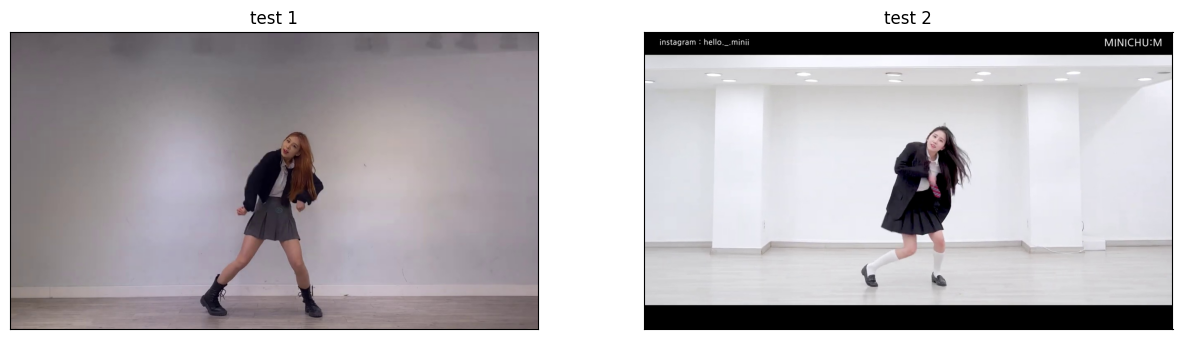

In [127]:
compareSim(320,420)

1/1 [==============================] - 0s 64ms/step
0.731
내적 3좌표 소요시간 :  1.04
 
1/1 [==============================] - 0s 37ms/step
0.715
조합 3좌표 소요시간 :  0.78
 
1/1 [==============================] - 0s 54ms/step
0.925
조합 2좌표 소요시간 :  1.24
 
 score :  59.948
동작 3좌표 소요시간 :  0.0
 
 score :  79.5
동작 2좌표 소요시간 :  0.0


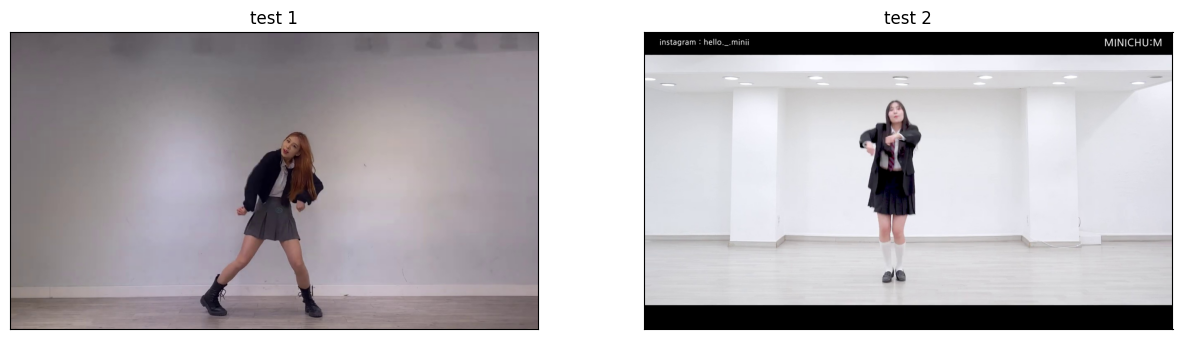

In [128]:
compareSim(320,1420)

1/1 [==============================] - 0s 48ms/step
0.624
내적 3좌표 소요시간 :  0.94
 
1/1 [==============================] - 0s 38ms/step
0.666
조합 3좌표 소요시간 :  0.83
 
1/1 [==============================] - 0s 38ms/step
0.931
조합 2좌표 소요시간 :  0.8
 
 score :  62.894
동작 3좌표 소요시간 :  0.0
 
 score :  77.034
동작 2좌표 소요시간 :  0.0


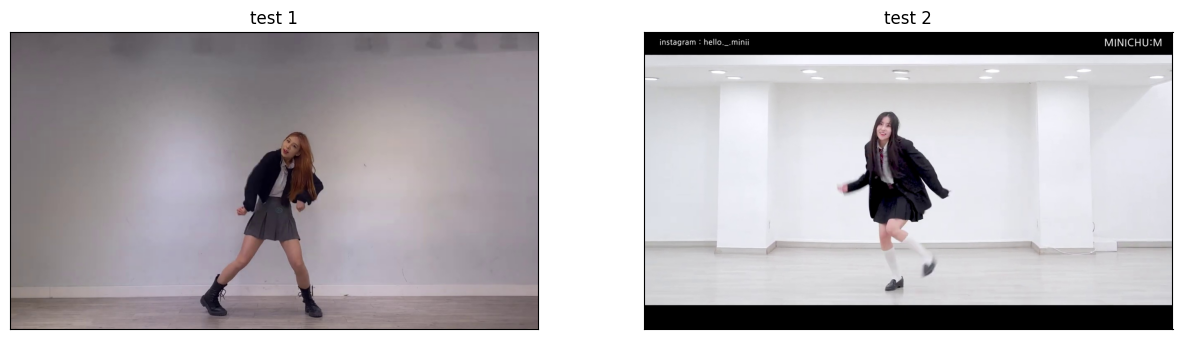

In [129]:
compareSim(320,1500)

1/1 [==============================] - 0s 62ms/step
0.964
내적 3좌표 소요시간 :  0.97
 
1/1 [==============================] - 0s 34ms/step
0.963
조합 3좌표 소요시간 :  0.81
 
1/1 [==============================] - 0s 49ms/step
0.989
조합 2좌표 소요시간 :  1.2
 
 score :  86.778
동작 3좌표 소요시간 :  0.0
 
 score :  92.154
동작 2좌표 소요시간 :  0.0


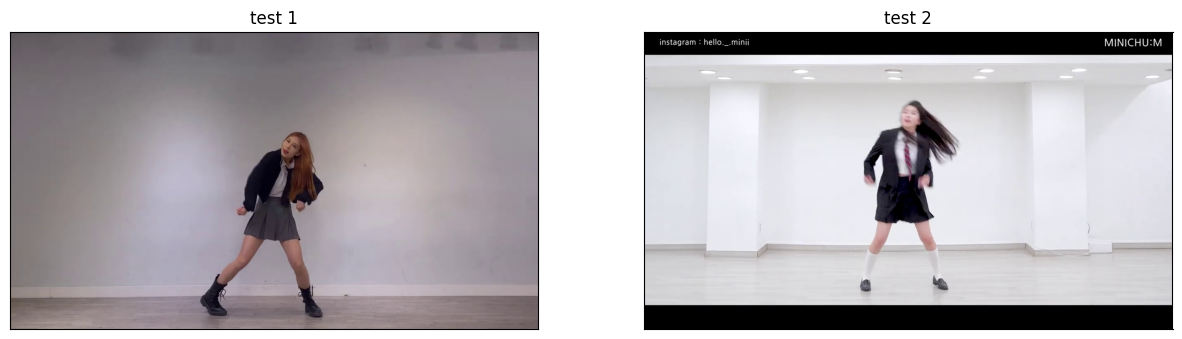

In [130]:
compareSim(320,440)

In [132]:
def compareSimSameVideo(test1,test2):

    #cross_xyz
    st_time=time.time()
    a,b=np.array(cross_xyz_1).swapaxes(1,2),np.array(cross_xyz_1).swapaxes(1,2)

    yhat1 = model1.predict(a[test1].reshape(1,3,78))
    yhat2 = model1.predict(b[test2].reshape(1,3,78))
    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))
    print('내적 3좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #comb_xyz
    st_time=time.time()
    a,b=np.array(comb_xyz_1).swapaxes(1,2),np.array(comb_xyz_1).swapaxes(1,2)

    yhat1 = model2.predict(a[test1].reshape(1,3,78))
    yhat2 = model2.predict(b[test2].reshape(1,3,78))

    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))
    print('조합 3좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #comb_xy
    st_time=time.time()
    a,b=np.array(comb_xy_1).swapaxes(1,2),np.array(comb_xy_1).swapaxes(1,2)

    yhat1 = model3.predict(a[test1].reshape(1,2,78))
    yhat2 = model3.predict(b[test2].reshape(1,2,78))

    print(cosine_similarity(yhat1.flatten(),yhat2.flatten()).round(3))
    print('조합 2좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #cosine_xyz
    st_time=time.time()
    cd1,cd2=cosine_xyz_1[test1],cosine_xyz_1[test2]
    check_sim(cd1,cd2)
    print('동작 3좌표 소요시간 : ', round(time.time()-st_time,2))
    print(' ')

    #cosine_xy
    st_time=time.time()
    cd1,cd2=cosine_xy_1[test1],cosine_xy_1[test2]
    check_sim(cd1,cd2)
    print('동작 2좌표 소요시간 : ', round(time.time()-st_time,2))

    frame_path1=f'sample/dancingImg/yt_newjeans_ditto1/{FRAME_LIST1[test1]}.jpg'
    frame_path2=f'sample/dancingImg/yt_newjeans_ditto1/{FRAME_LIST1[test2]}.jpg'
    show_img(frame_path1,frame_path2)

1/1 [==============================] - 0s 205ms/step
0.766
내적 3좌표 소요시간 :  1.43
 
1/1 [==============================] - 0s 38ms/step
0.749
조합 3좌표 소요시간 :  0.83
 
1/1 [==============================] - 0s 37ms/step
0.81
조합 2좌표 소요시간 :  0.8
 
 score :  67.002
동작 3좌표 소요시간 :  0.0
 
 score :  70.036
동작 2좌표 소요시간 :  0.0


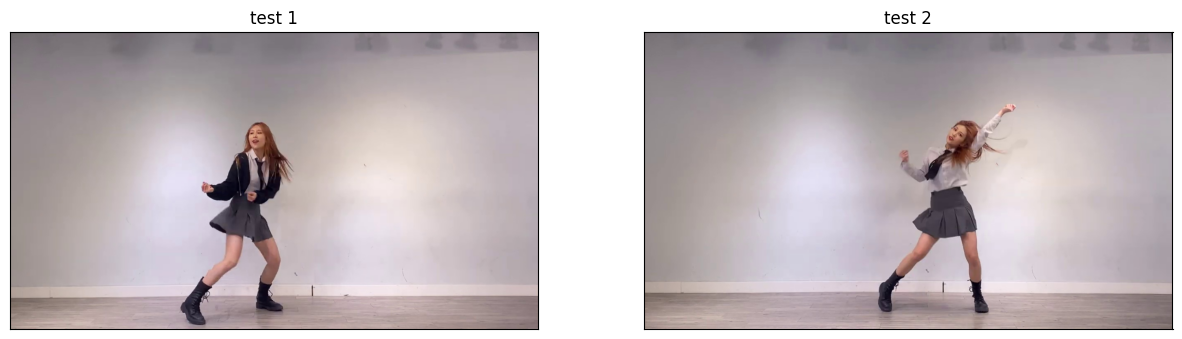

In [135]:
compareSimSameVideo(1000,2020)